[  3.29670330e-05   1.37362637e-05]


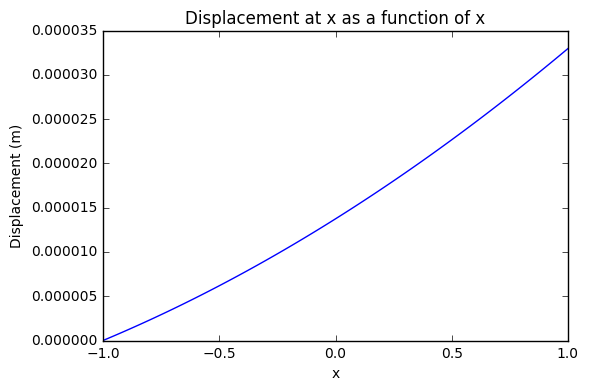

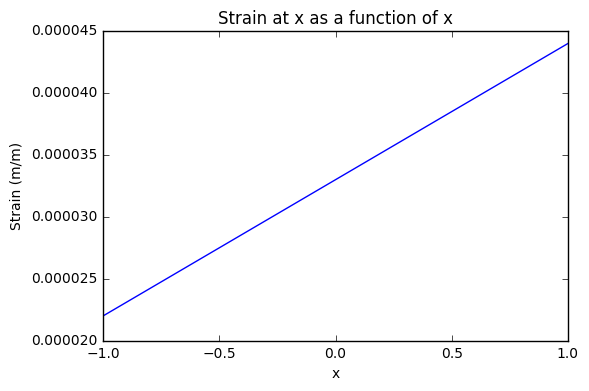

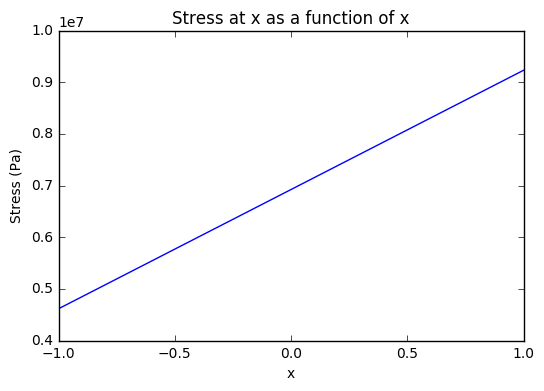

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define nodal coordinates
x1 = 0
x2 = 1.0
x3 = 0.5

# Define material
def E(z):
    return 210E9

# Setup shape functions over local coordinates
def N1(z):
    return -0.5*z*(1-z)
def N2(z):
    return 0.5*z*(1+z)
def N3(z):
    return (1-z)*(1+z)

# Setup the derivatives for shape functions over local coordinates
def dN1(z):
    return z-0.5
def dN2(z):
    return z + 0.5
def dN3(z):
    return -2*z

# Setup the derivative of shape functions vector
def dN(z):
    return np.array([dN1(z),dN2(z),dN3(z)])

# Setup mapping x to z
def x(z):
    return N1(z)*x1 + N2(z)*x2 + N3(z)*x3

# Setup dxdz function
def dxdz(z):
    return np.dot(dN(z),np.array([x1,x2,x3]))

# Setup B vector (as agreed in class)
def B(z):
    return 1/dxdz(z)*dN(z)

# Define the area in local coordinates
def A(z):
    return 0.0002 - 0.0001*x(z)

# Setup the Stiffness matrix K in local coordinates
def K(z):
    return E*np.outer(B(z),B(z))*A(z)*dxdz(z)

# Gauss quadrature (Two Gauss points)
gz1 = -1/np.sqrt(3)
gz2 = 1/np.sqrt(3)
# Gauss quadrature weights
gw1 = 1
gw2 = 1

# Numerically integrate the stiffness matrix
Kint = gw1*K(gz1) + gw2*K(gz2)

# Setup all loads in the problem
f = np.array([0,1000,0])

# Partition system into known and unknown values for q

# Which of q1, q2, q3 are prescribed? q1 = 0

# Only q2 and q3 are unknown -> that we need to solve for
qsolve = np.linalg.solve(Kint[1:,1:],f[1:])

q1 = 0
q2 = qsolve[0]
q3 = qsolve[1]

print(qsolve)

def u(z):
    return N1(z)*q1 + N2(z)*q2 + N3(z)*q3

def strain(z):
    result = []
    q = np.array([q1,q2,q3])
    for zeta in z:
        result = result + [np.dot(q,B(zeta))]
        
    return np.array(result)

zvec = np.linspace(-1,1,101)
plt.figure(1)
plt.plot(zvec,u(zvec));plt.title('Displacement at x as a function of x');plt.xlabel('x');plt.ylabel('Displacement (m)')
plt.figure(2)
plt.plot(zvec,strain(zvec));plt.title('Strain at x as a function of x');plt.xlabel('x');plt.ylabel('Strain (m/m)')
plt.figure(3)
plt.plot(zvec,E*strain(zvec));plt.title('Stress at x as a function of x');plt.xlabel('x');plt.ylabel('Stress (Pa)')
plt.show()

# What is the reaction force?